# Storytelling with Data! in Altair

by Maisa de Oliveira Fraiz

## Introduction

This project aims to replicate the examples from Cole Nussbaumer's book, "Storytelling with Data - Let's Practice!", using `Python Altair`. Our primary objective is to document the reasoning behind the modifications proposed by the author, while also highlighting the challenges that arise when transitioning from the book's Excel-based approach to programming in a different software environment.

`Altair` was selected for this project due to its declarative syntax, interactivity, grammar of graphics, and compatibility with `Streamlit` and other web formatting tools, while within the user-friendly Python environment. Anticipated challenges include the comparatively smaller documentation and development community of Altair compared to more established libraries like `Matplotlib`, `Seaborn`, or `Plotly`. Furthermore, tasks that might appear straightforward in Excel may require multiple iterations to translate effectively into the language.


## Imports

In [2]:
import pandas as pd
import numpy as np
import altair as alt

## Chapter 2 - Choose an effective visual

*"When I have some data I need to show, how do I do that in an effective way?"*

This chapter's exercises aim to incentivize evaluating different graphs for the same data in order to understand the strengths and constraints of each, helping in the process of finding the best medium to present the information you want to highlight.

### Exercise 2.1 - improve this table

The data for this exercise can be found here: https://www.storytellingwithdata.com/letspractice/downloads

The first problem with the Excel-to-Altair translation arises from the data itself, as it is polluted with titles and texts for readability in Excel. This, however, is not friendly when dealing with Python, so we should be careful when loading it.

In [3]:
# Example of wrong loading
table = pd.read_excel(r"..\..\Data\2.1 EXERCISE.xlsx")
table

,EXERCISE 2.1,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,FIG 2.1a,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,New client tier share,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,Tier,# of Accounts,% Accounts,Revenue ($M),% Revenue
6,NaN,A,77,0.070772,4.675,0.25
7,NaN,A+,19,0.017463,3.927,0.21
8,NaN,B,338,0.310662,5.984,0.32
9,NaN,C,425,0.390625,2.805,0.15


In [4]:
del table

In [5]:
# Right loading
table = pd.read_excel(r"..\..\Data\2.1 EXERCISE.xlsx", usecols = [1, 2, 3, 4, 5], header = 6)
table

,Tier,# of Accounts,% Accounts,Revenue ($M),% Revenue
0,A,77,0.070772,4.675,0.25
1,A+,19,0.017463,3.927,0.21
2,B,338,0.310662,5.984,0.32
3,C,425,0.390625,2.805,0.15
4,D,24,0.022059,0.374,0.02


For the first alterations, the book suggests enhancing readability by making the following improvements:

* Order the tiers.
* Add a row containing the total value.
* As the total percentage of the tiers do not sum to 100%, add a category called "All others" to encompass not mentioned values.
* Round the numbers and transform the percentage.

In [6]:
# Ordering the tiers

table = table.loc[[1, 0, 2, 3, 4]]

In [7]:
# Fixing the percentages

table['% Accounts'] = table['% Accounts'].apply(lambda x: x*100)
table['% Revenue'] = table['% Revenue'].apply(lambda x: x*100)

In [8]:
# Calculating and adding "All other" values

other_account_per = 100 - table['% Accounts'].sum()
other_revenue_per = 100 - table['% Revenue'].sum()

other_account_num = (other_account_per*table['# of Accounts'][0])/table['% Accounts'][0]
other_revenue_num = (other_revenue_per*table['Revenue ($M)'][0])/table['% Revenue'][0]

table.loc[len(table)] = ["All other", other_account_num, other_account_per, other_revenue_num, other_revenue_per]


In [9]:
# Since we will use not-rounded values or the total rwo for the graphs,
# we should create a new variable before making the following alterations

table_charts = table.copy()

In [10]:
# Adding total values row

table.loc[len(table)] = ["Total", table['# of Accounts'].sum(), table['% Accounts'].sum(),
                        table['Revenue ($M)'].sum(), table['% Revenue'].sum()]

In [11]:
# Rounding the numbers

table['% Accounts'] = table['% Accounts'].apply(lambda x: round(x))
table['Revenue ($M)'] = table['Revenue ($M)'].apply(lambda x: round(x, 1))

The new table is as follows:

In [12]:
table

,Tier,# of Accounts,% Accounts,Revenue ($M),% Revenue
1,A+,19.0,2,3.9,21.0
0,A,77.0,7,4.7,25.0
2,B,338.0,31,6.0,32.0
3,C,425.0,39,2.8,15.0
4,D,24.0,2,0.4,2.0
5,All other,205.0,19,0.9,5.0
6,Total,1088.0,100,18.7,100.0


or, for even better readability:

In [13]:
table.set_index("Tier")

,# of Accounts,% Accounts,Revenue ($M),% Revenue
Tier,,,,
A+,19.0,2,3.9,21.0
A,77.0,7,4.7,25.0
B,338.0,31,6.0,32.0
C,425.0,39,2.8,15.0
D,24.0,2,0.4,2.0
All other,205.0,19,0.9,5.0
Total,1088.0,100,18.7,100.0


* Note: the author adds the % symbol next to the number in the percentage columns. Doing this in Python will transform the data from "int" to "string", and therefore is not recommended.

# 

As you can see, modifications that might have been achieved with just a few clicks in Excel may require some effort when using a programming language. 

The author also suggests changes such as colors of rows, alignment of text, and embedding graphs into the table to represent percentage columns. These changes are not compatible with Pandas DataFrame.  

* CONSULTAR ASLA - vale a pena tentar algo com o altair?

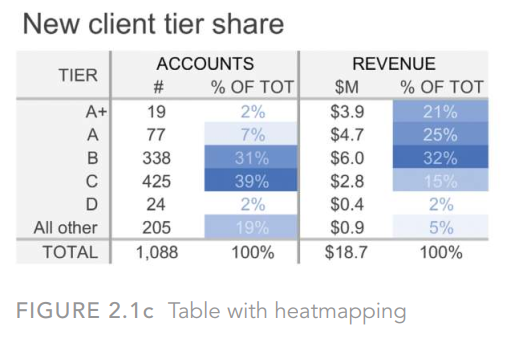

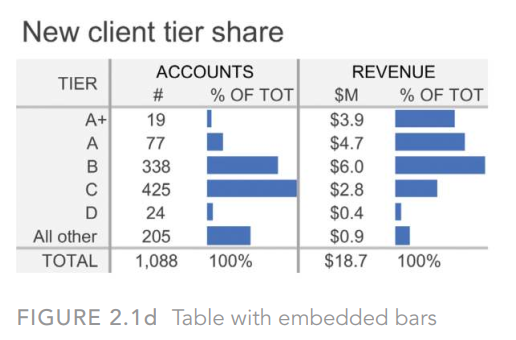

Considering that percentages depict a fraction of a whole, the next proposal is to employ a pie chart.

Here is the default Altair graph version:

In [25]:
alt.Chart(table_charts).mark_arc().encode(
    theta="% Accounts",
    color=alt.Color('Tier:N'),
)

alt.Chart(...)

Here are some needed adjustments to bring it closer to the original:


* Order the Tiers that have been rearranged. 

* By default, the Tiers' labels appear in the legend, whereas in the book, they are displayed next to the corresponding of slice of pie.

* By default, there is a lack of title.

In [26]:
## % of Accounts Pie Chart

base = alt.Chart(table_charts, title="% of Total Accounts").encode(
    theta = alt.Theta("% Accounts:Q").stack(True),
    color = alt.Color('Tier:N').legend(None),
    order = alt.Order(field ='Tier:O'))



pie = base.mark_arc(outerRadius = 115)
text = base.mark_text(radius = 140, size = 15).encode(text = alt.Text("Tier"))


acc_pie = pie + text
acc_pie

alt.LayerChart(...)

The pie chart above is easily modified to represent the percentage of total revenue.

In [27]:
# % of Revenue Pie Chart

base = alt.Chart(table_charts, title="% of Total Revenue").encode(
    theta = alt.Theta("% Revenue:Q").stack(True),
    color = alt.Color('Tier:N').legend(None),
    order = alt.Order(field ='Tier:O'))



pie = base.mark_arc(outerRadius = 115)
text = base.mark_text(radius = 135, size = 14, align = "left").encode(text = alt.Text("Tier"))


rev_pie = pie + text
rev_pie 

alt.LayerChart(...)

With both graphs available, we can add them next to each other and include a main title.

In [28]:
# Finished Pie Chart

pies = acc_pie | rev_pie

pies.properties(
    title = alt.Title('New Client Tier Share', offset = 40, fontSize = 30)
)



alt.HConcatChart(...)

* Add text explaining why pie charts aren't preferable for this type of data (with reference)!!

The next graph proposed to tackle this data is a horizontal bar chart. 

This is the default representation in Altair:

In [29]:
#Basic altair bar chart

alt.Chart(table_charts).mark_bar().encode(
    y = alt.Y('Tier', sort = ["A+"]),
    x = alt.X('% Accounts'))

alt.Chart(...)

Here are some adjustments needed:

* "Tier" label on the left upper corner.

* Values represented next to the bar, instead of an x-axis.

* Add title.

In [30]:
# Alterations as per book

title = alt.TitleParams('% OF TOTAL ACCOUNTS', dy=12)

base = alt.Chart(table_charts, title = title).mark_bar().encode(
    y = alt.Y('Tier', sort = ["A+"], title = "TIER", axis = alt.Axis(titleY = 0, titleAlign = "left", titleAngle = 0)),
    x = alt.X('% Accounts').axis(None),
    text = alt.Text("% Accounts", format = ".0f"))

final_acc = base.mark_bar() + base.mark_text(align = 'left', dx = 2)
final_acc

alt.LayerChart(...)

Now we do the same for the revenue column.

* In addition, the y-axis is removed.

In [31]:
base = alt.Chart(table_charts, title = "% OF TOTAL REVENUE").mark_bar().encode(
    y = alt.Y('Tier', sort = ["A+"]).axis(None),
    x = alt.X('% Revenue').axis(None),
    text = alt.Text("% Revenue", format = ".0f"))

final_rev = base.mark_bar() + base.mark_text(align = 'left', dx = 2)
final_rev

alt.LayerChart(...)

Similar to the pie chart, we can arrange these graphs side by side and include a main title.

In [32]:
final = final_acc | final_rev
final.configure_view(stroke=None).properties(
    title = alt.Title('New Client Tier Share', offset = 25, fontSize = 20)
)

alt.HConcatChart(...)

We can now merge these two bar charts into a single graph.

In [33]:
# Default by Altair

alt.Chart(table_charts).mark_bar().encode(
    x = alt.X('value:Q'),
    y = alt.Y('variable:N'),
    color = alt.Color('variable:N', legend = alt.Legend(title = 'Metric')),
    row = alt.Row(
                'Tier:O'
                )
).transform_fold(
    fold = ['% Accounts', '% Revenue'],
    as_ = ['variable', 'value']
)

alt.Chart(...)

* Add list of alterations done.

In [34]:
# Proper alterations

alt.Chart(table_charts).mark_bar().encode(
    x = alt.X('value:Q', axis = alt.Axis(title = None, grid = False, orient = "top")),
    y = alt.Y('variable:N', axis = alt.Axis(title = None, labels = False, ticks = False)),
    color = alt.Color('variable:N', legend = alt.Legend(title = 'Metric')),
    row = alt.Row(
                'Tier:O', 
                header = alt.Header(labelAngle = 0, labelAlign = "left"), 
                title = None,
                sort = ['A+'],
                spacing = 10
                )
).transform_fold(
    fold = ['% Accounts', '% Revenue'],
    as_ = ['variable', 'value']
).properties(title = {
      "text": ["New client tier share"], 
      "subtitle": ["% OF TOTAL ACCOUNTS vs REVENUE", " ", "Tier"]
    }
).configure_view(stroke = None)

alt.Chart(...)

We can modify this chart to be in a vertical orientation.

In [35]:
alt.Chart(table_charts).mark_bar().encode(
    y = alt.Y('value:Q', axis = alt.Axis(title='%', grid = False)),
    x = alt.X('variable:N', axis = alt.Axis(title = None, labels = False)),
    color = alt.Color('variable:N', legend = alt.Legend(title = 'Metric')),
    column = alt.Column(
        'Tier:O', 
        header = alt.Header(labelOrient = 'bottom', titleOrient = "bottom", titleAnchor = "start"),
        sort = ['A+']
        )
).transform_fold(
    fold = ['% Accounts', '% Revenue'],
    as_=['variable', 'value']
).properties(title = {
      "text": ["New client tier share"], 
      "subtitle": ["% OF TOTAL ACCOUNTS vs REVENUE"],
    }
).configure_view(stroke = None)



alt.Chart(...)

* Changes not applied: instead of a legend, the author corresponds the color in the text of the title with the color of the bars. Although more elegant, this is not compatible with Altair.

In [58]:
melted_table = pd.melt(table_charts, id_vars = ['Tier'], var_name='Metric', value_name='Value')
melted_table

,Tier,Metric,Value
0,A+,# of Accounts,19.000000
1,A,# of Accounts,77.000000
2,B,# of Accounts,338.000000
3,C,# of Accounts,425.000000
4,D,# of Accounts,24.000000
5,All other,# of Accounts,205.000000
6,A+,% Accounts,1.746324
7,A,% Accounts,7.077206
8,B,% Accounts,31.066176
9,C,% Accounts,39.062500


In [146]:
selected_rows = melted_table[melted_table['Metric'].isin(['% Accounts', '% Revenue'])]

alt.Chart(selected_rows).mark_bar().encode(
    y = alt.Y('Value', axis = alt.Axis(title='%', grid = False)),
    x = alt.X('Metric', axis = alt.Axis(title = None, labels = False)),
    color = alt.Color('Metric'),
    column = alt.Column('Tier',
             sort = ['A+']
    )
    ).properties(title = {
      "text": ["New client tier share"], 
      "subtitle": ["% OF TOTAL ACCOUNTS vs REVENUE"],
    }
).configure_view(stroke = None)


alt.Chart(...)

ValueError: Faceted charts cannot be layered. Instead, layer the charts before faceting.


In [148]:
alt.Chart(selected_rows).mark_bar().encode(
    y = alt.Y('Value', axis = alt.Axis(title='%', grid = False)),
    x = alt.X('Tier', axis = alt.Axis(title = None), sort = ['A+']),
    color = alt.Color('Metric'),
    xOffset = 'Metric'
    ).properties(title = {
      "text": ["New client tier share"], 
      "subtitle": ["% OF TOTAL ACCOUNTS vs REVENUE"]
    }
)

alt.Chart(...)

In [152]:
base = alt.Chart(selected_rows)


bars = base.mark_bar().encode(
    y = alt.Y('Value', axis = alt.Axis(title='%', grid = False)),
    x = alt.X('Tier', axis = alt.Axis(title = None), sort = ['A+']),
    color = alt.Color('Metric'),
    xOffset = 'Metric'
    ).properties(title = {
      "text": ["New client tier share"], 
      "subtitle": ["% OF TOTAL ACCOUNTS vs REVENUE"]
    }
)

rule1 = selected_rows[]

rule = base.mark_rule().encode(
    x = alt.value(10),
    x2 = alt.value(3),
    y = alt.value(3)
    )

bars + rule

alt.LayerChart(...)

### Failed charts so far...

Consultar Asla.

In [428]:
base = alt.Chart(selected_rows)


bars = base.mark_bar().encode(
    y = alt.Y('Value', axis = alt.Axis(title='%', grid = False)),
    x = alt.X('Tier', axis = alt.Axis(title = None), sort = ['A+']),
    color = alt.Color('Metric'),
    xOffset = 'Metric'
    ).properties(title = {
      "text": ["New client tier share"], 
      "subtitle": ["% OF TOTAL ACCOUNTS vs REVENUE"],
    }
)


rule_asc = base.mark_rule(x2Offset = 10, xOffset = -10
).encode(
    x = alt.X('Tier', sort = ['A+']),
    x2 = alt.X2('Tier'),
    y = alt.Y('min(Value)'),
    y2 = alt.Y2('max(Value)'),
    opacity = alt.condition(
        (alt.datum.Tier == 'A+') | 
        (alt.datum.Tier == 'A')  |
        (alt.datum.Tier == 'B'), 
        alt.value(1), alt.value(0)
        )
    )

rule_desc = base.mark_rule(x2Offset = 10, xOffset = -10
).encode(
    x = alt.X('Tier', sort = ['A+']),
    x2 = alt.X2('Tier'),
    y = alt.Y('max(Value)'),
    y2 = alt.Y2('min(Value)'),
    opacity = alt.condition(
        (alt.datum.Tier == 'A+') | 
        (alt.datum.Tier == 'A')  |
        (alt.datum.Tier == 'B'), 
        alt.value(0), alt.value(1)
        )
    )


bars + rule_asc + rule_desc


alt.LayerChart(...)

In [431]:
rule = rule_asc + rule_desc
rule.properties(
    width = 300,
    height = 350
)

alt.LayerChart(...)

alt.Chart(selected_rows).mark_line().encode(
    x='Metric',
    y='Value',
    color='Tier'
)

In [111]:
base = alt.Chart(selected_rows).mark_line(point=True).encode(
    x = alt.X('Metric', axis = alt.Axis(title = None)),
    y = alt.Y('Value', axis = alt.Axis(grid = False)),
    color ='Tier'
).properties(
    width = 200,
    height = 150
).configure_view(stroke = None)


text = chart.encode(
    x = alt.X('date:T', aggregate = 'max'),
    y = alt.Y('price:Q', aggregate = {'argmax': 'date'}),
    text = 'symbol'
).mark_text(align = 'left', dx = 4)label.mark_text(align = 'left', dx = 4)

alt.Chart(...)